In [143]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Diagnostic)                                                    17    
Car Evaluation                 

In [144]:
deb_diabet = fetch_ucirepo(id=329)
deb_diabet

{'data': {'ids': None,
  'features':       quality  pre_screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1  \
  0           1              1   22   22   22   19   18   14  49.895756   
  1           1              1   24   24   22   18   16   13  57.709936   
  2           1              1   62   60   59   54   47   33  55.831441   
  3           1              1   55   53   53   50   43   31  40.467228   
  4           1              1   44   44   44   41   39   27  18.026254   
  ...       ...            ...  ...  ...  ...  ...  ...  ...        ...   
  1146        1              1   34   34   34   33   31   24   6.071765   
  1147        1              1   49   49   49   49   45   37  63.197145   
  1148        1              0   49   48   48   45   43   33  30.461898   
  1149        1              1   39   36   29   23   13    7  40.525739   
  1150        1              1    7    7    7    7    7    5  69.423565   
  
         exudate2   exudate3   exudate3  exudate5  exudate6  e

In [145]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/329/data.csv')

In [146]:
data.head()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [147]:
data.dtypes

quality                        int64
pre_screening                  int64
ma1                            int64
ma2                            int64
ma3                            int64
ma4                            int64
ma5                            int64
ma6                            int64
exudate1                     float64
exudate2                     float64
exudate3                     float64
exudate3.1                   float64
exudate5                     float64
exudate6                     float64
exudate7                     float64
exudate8                     float64
macula_opticdisc_distance    float64
opticdisc_diameter           float64
am_fm_classification           int64
Class                          int64
dtype: object

In [148]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [149]:
columns = list(X.columns)

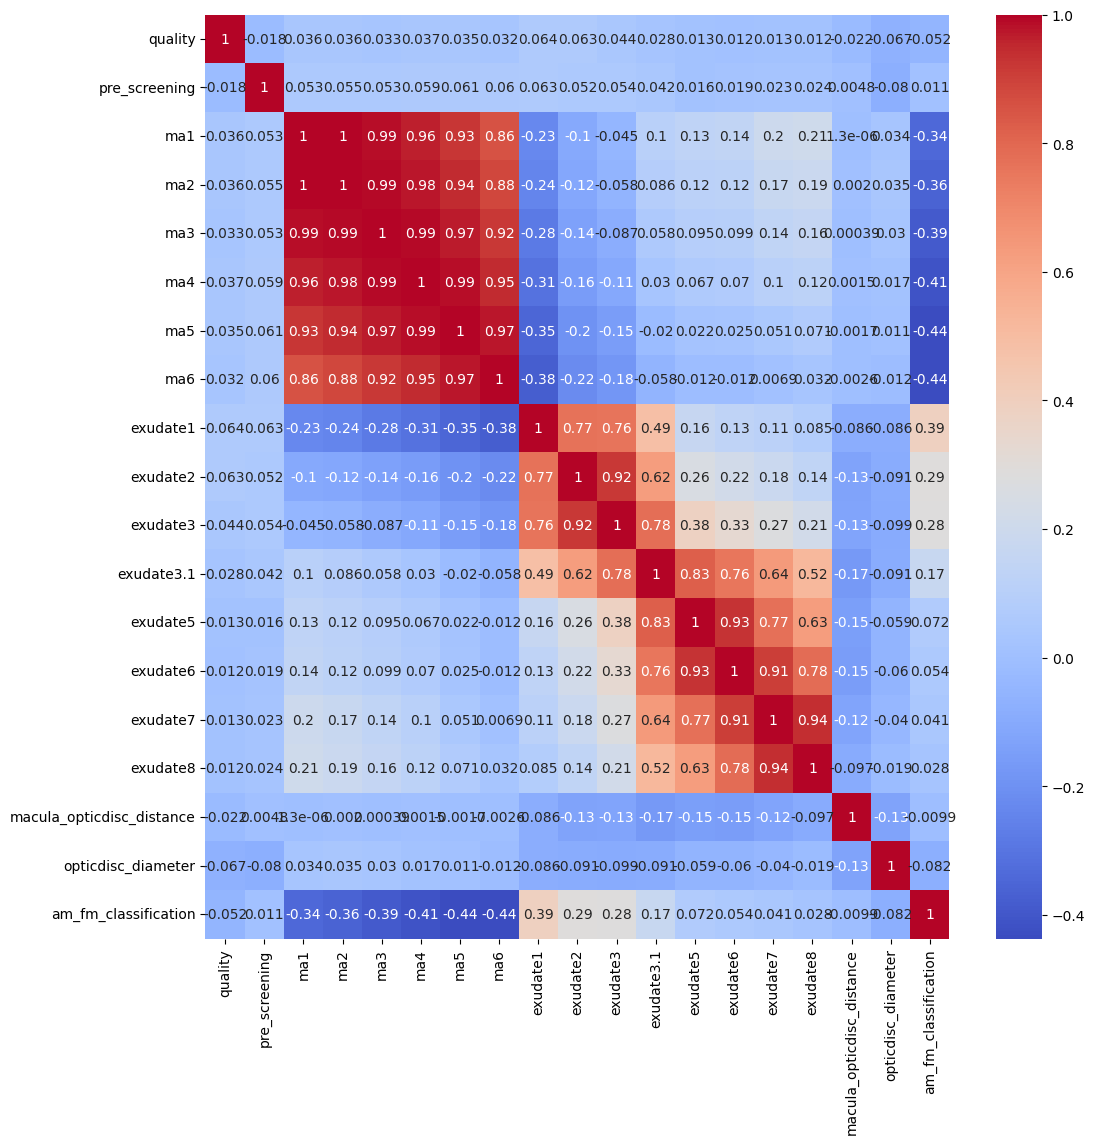

<Figure size 640x480 with 0 Axes>

In [150]:
plt.figure(figsize=[12, 12])
sns.heatmap(X[columns].corr(), annot=True, cmap='coolwarm')
plt.show()
plt.clf()

In [151]:
X = StandardScaler().fit_transform(X)

In [152]:
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=8)

In [153]:
rfe.fit_transform(X, y)

array([[-0.6414863 , -0.61878225, -0.57646257, ..., -0.19440942,
        -0.20512449, -0.18616904],
       [-0.56339113, -0.53577796, -0.57646257, ..., -0.19721162,
        -0.20517467, -0.18628084],
       [ 0.92041699,  0.9582994 ,  1.04666546, ...,  0.1523301 ,
        -0.1100434 , -0.16480849],
       ...,
       [ 0.41279842,  0.46027361,  0.56411388, ..., -0.20090532,
        -0.21496782, -0.2080998 ],
       [ 0.0223226 , -0.03775217, -0.26938429, ...,  0.10842599,
         0.38614017,  0.76787769],
       [-1.22720003, -1.24131448, -1.23448744, ..., -0.19288765,
        -0.21496782, -0.2080998 ]])

In [154]:
rfe.ranking_

array([ 7,  8,  1,  1,  1,  1,  1,  2,  5,  6,  9,  4,  3,  1,  1,  1, 12,
       10, 11])

In [155]:
rfe.support_

array([False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False])

In [156]:
list(zip(columns, rfe.support_))

[('quality', False),
 ('pre_screening', False),
 ('ma1', True),
 ('ma2', True),
 ('ma3', True),
 ('ma4', True),
 ('ma5', True),
 ('ma6', False),
 ('exudate1', False),
 ('exudate2', False),
 ('exudate3', False),
 ('exudate3.1', False),
 ('exudate5', False),
 ('exudate6', True),
 ('exudate7', True),
 ('exudate8', True),
 ('macula_opticdisc_distance', False),
 ('opticdisc_diameter', False),
 ('am_fm_classification', False)]

In [157]:
features = [f for (f, support) in zip(columns, rfe.support_) if support]

In [158]:
features

['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'exudate6', 'exudate7', 'exudate8']

In [159]:
rfe.score(X, y)

0.7254561251086012

In [160]:
corr_matrix = data[features].corr()

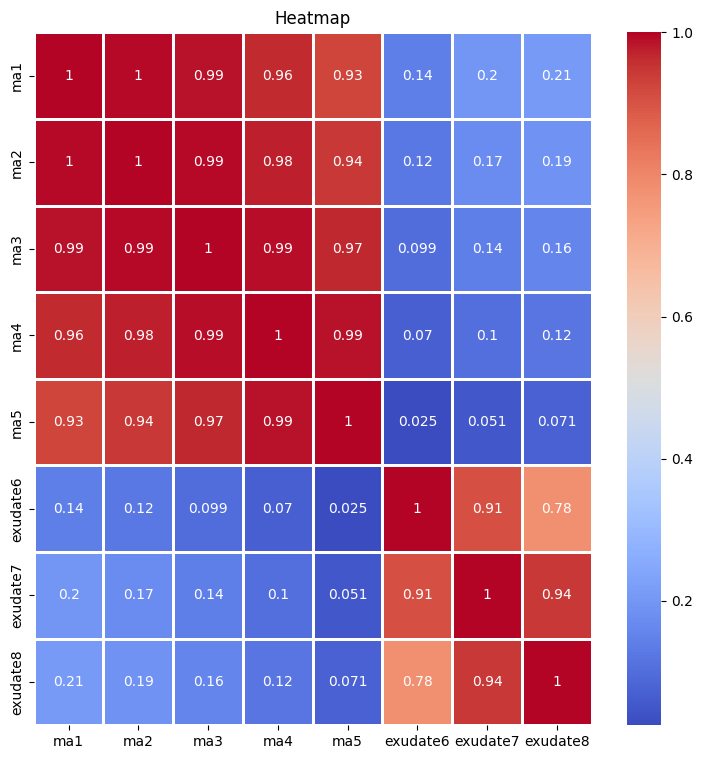

<Figure size 640x480 with 0 Axes>

In [161]:
plt.figure(figsize=[9, 9])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='white', linewidths=2)
plt.title('Heatmap')
plt.show()
plt.clf()